In [41]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import re
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.font_manager

fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(fonts)

['/usr/share/texmf/fonts/opentype/public/lm/lmroman6-bold.otf', '/usr/share/fonts/opentype/tlwg/Sawasdee-Bold.otf', '/usr/share/fonts/truetype/noto/NotoSansBuginese-Regular.ttf', '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Bold.otf', '/usr/share/fonts/truetype/roboto/unhinted/RobotoTTF/Roboto-Black.ttf', '/usr/share/fonts/opentype/tlwg/TlwgTypist-BoldOblique.otf', '/usr/share/fonts/truetype/adf/UniversalisADFStd-Italic.otf', '/usr/share/fonts/truetype/charis/CharisSIL-BoldItalic.ttf', '/usr/share/fonts/truetype/noto/NotoSansHebrew-Regular.ttf', '/usr/share/fonts/truetype/noto/NotoSerifArmenian-Regular.ttf', '/usr/share/fonts/truetype/noto/NotoSerifMalayalam-Regular.ttf', '/usr/share/fonts/fonts-go/Go-Mono-Bold.ttf', '/usr/share/fonts/truetype/noto/NotoSansOriya-Bold.ttf', '/usr/share/fonts/truetype/noto/NotoSerifMalayalam-Bold.ttf', '/usr/share/fonts/truetype/noto/NotoSansMiao-Regular.ttf', '/usr/share/texmf/fonts/opentype/public/lm/lmroman9-bold.otf', '/usr/share/fonts/opentype

In [9]:
#def function for import coords
path = 'Pt_MAT_analysis'
def import_coords(file):
    file_path = path + "/" + file 
    coords = pd.read_csv(file_path, skiprows=4, sep='\t', header=None)
    coords.columns = ["S1", "E1", "S2", "E2", "LENR", "LENQ", "Identity", "LEN1", "LEN2", "COVR", "COVQ", "REF", "QUERY"]
    coords["strand"] = np.where(coords["S2"] < coords["E2"], "+", "-")
    return coords

In [10]:
#Look for the local folder which contain coords file
#List file
os.listdir(path)
#For files in path, import coords
files = [f for f in os.listdir(path) if f.endswith('.coords')]
#Create a list of coords
coords_list = []
for file in files:
    coords_list.append(import_coords(file))


In [11]:
#Function for filtering coords
def filter_nucmer(df, mini_length, mini_identity):
    df = df[(df.LENR > mini_length)]
    df = df[(df.LENQ > mini_length)]
    df = df[(df.Identity >= mini_identity)]
    return df

In [12]:
#filter coords
filtered_coords_list = []
for df in coords_list:
    filtered_coords_list.append(filter_nucmer(df, 1000, 90))

In [13]:
#Reverse Pt15_3A and Pt15_3B if present in QUERY column
#Replace S2 and E2 if QUERY has Pt15_3A and Pt15_3B
df = filtered_coords_list[0]
df1 = df.copy()
#Replace S2 and E2 at the same time
df1.loc[df1['QUERY'].str.contains("Pt15_chr3_A"), "S2"] = df.loc[df['QUERY'].str.contains("Pt15_chr3_A"), "LEN2"] - df.loc[df['QUERY'].str.contains("Pt15_chr3_A"), "S2"]
df1.loc[df1['QUERY'].str.contains("Pt15_chr3_A"), "E2"] = df.loc[df['QUERY'].str.contains("Pt15_chr3_A"), "LEN2"] - df.loc[df['QUERY'].str.contains("Pt15_chr3_A"), "E2"]
df1.loc[df1['QUERY'].str.contains("Pt15_chr3_B"), "S2"] = df.loc[df['QUERY'].str.contains("Pt15_chr3_B"), "LEN2"] - df.loc[df['QUERY'].str.contains("Pt15_chr3_B"), "S2"]
df1.loc[df1['QUERY'].str.contains("Pt15_chr3_B"), "E2"] = df.loc[df['QUERY'].str.contains("Pt15_chr3_B"), "LEN2"] - df.loc[df['QUERY'].str.contains("Pt15_chr3_B"), "E2"]
        #Reverse strand information, make strand "+" if it used to be "-", and vice versa"
df1.loc[df1.QUERY.str.contains("Pt15_chr3_A"), ["strand"]] = np.where(df1.loc[df1['QUERY'].str.contains("Pt15_chr3_A"), ["strand"]] == "+", "-", "+")
df1.loc[df1.QUERY.str.contains("Pt15_chr3_B"), ["strand"]] = np.where(df1.loc[df['QUERY'].str.contains("Pt15_chr3_B"), ["strand"]] == "+", "-", "+")
filtered_coords_list[0] = df1

In [14]:
#Read gff file
gff_path = "Pt_MAT_analysis/Pt_MAT.gff"
gff = pd.read_csv(gff_path, sep='\t', header=None)
gff.columns = ["seqid", "source", "type", "start", "end", "score1", "strand", "score2", "geneid", "MAT"]


In [15]:
filtered_coords_list[0].loc[filtered_coords_list[0].QUERY.str.contains("Pt15_chr3"), ["QUERY","LEN2"]].drop_duplicates()

QUERY     LEN2
52      Pt15_chr3_A  8806656
443289  Pt15_chr3_B  8495914

In [16]:
gff.loc[gff['seqid'].str.contains("Pt15_chr3_A"), "start"] = 8806656 - gff.loc[gff['seqid'].str.contains("Pt15_chr3_A"), "start"]
gff.loc[gff['seqid'].str.contains("Pt15_chr3_A"), "end"] = 8806656 - gff.loc[gff['seqid'].str.contains("Pt15_chr3_A"), "end"]
gff.loc[gff['seqid'].str.contains("Pt15_chr3_B"), "start"] = 8495914 - gff.loc[gff['seqid'].str.contains("Pt15_chr3_B"), "start"]
gff.loc[gff['seqid'].str.contains("Pt15_chr3_B"), "end"] = 8495914 - gff.loc[gff['seqid'].str.contains("Pt15_chr3_B"), "end"]

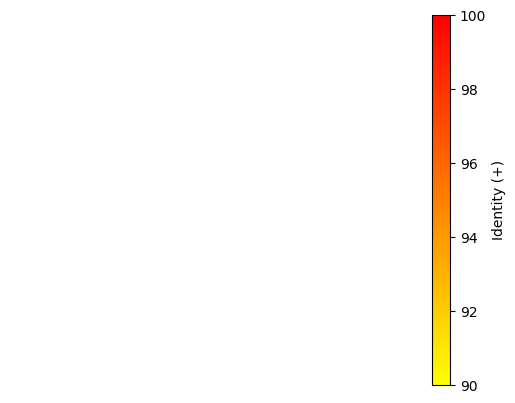

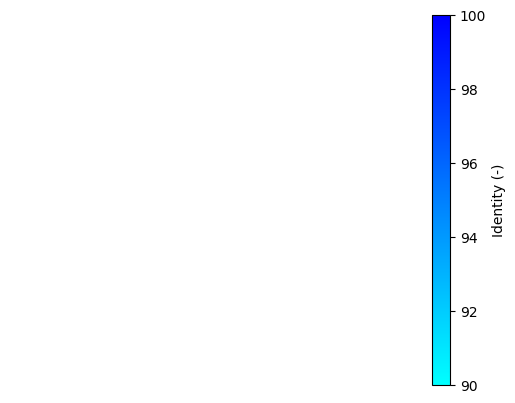

In [17]:
cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['yellow', 'red'])
cmap2 = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['cyan', 'blue'])
norm = plt.Normalize(90, 100)

# Forward Strand
fig, ax = plt.subplots()
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Identity (+)')
ax.axis('off')
plt.show()

# Reverse Strand
fig, ax = plt.subplots()
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap2)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Identity (-)')
ax.axis('off')
plt.show()

#If has only 1 query and 1 ref, use this one

In [42]:
#If has only 1 query and 1 ref, use this one
def makeplot(paf, fsize):
    rows=len(paf["QUERY"].unique())
    cols=len(paf["REF"].unique())
    plt.figure(figsize=(fsize*cols,fsize*rows))
    plt.rcParams['text.usetex'] = True
    x_chromosome = paf["QUERY"].unique()
    y_chromosome = paf["REF"].unique()
    gff_query = gff[gff["seqid"] == x_chromosome[0]]
    gff_ref = gff[gff["seqid"] == y_chromosome[0]]
    #Reverse y_chromosome order
    #y_chromosome = y_chromosome[::-1]
    for row in range(rows):
       for col in range(cols):
            filter_paf = paf[(paf.QUERY.isin([x_chromosome[row]])) & (paf.REF.isin([y_chromosome[col]]))]
            filename = str(filter_paf["QUERY"].unique()[0]) + "_" + str(filter_paf["REF"].unique()[0]) + ".svg"
 ##           if len(filter_paf) > 0 :
            for index, line in filter_paf.iterrows():        
                if line['strand'] == '+':
                   #     ax[col,row].set(xlabel=filter_paf["QUERY"].unique())
                        point1 = [line['S1'], line['S2']]
                        point2 = [line['E1'], line['E2']]
                        x_tmp = [point1[1], point2[1]]
                        y_tmp = [point1[0], point2[0]]
                        identity = [line['Identity']]
                        plt.plot(x_tmp, y_tmp, linewidth=1.5, color=cmap(norm(identity)))                      
                if line['strand'] == '-':
                  #      ax[col,row].set(xlabel=filter_paf["QUERY"].unique())
                        point1 = [line['S1'], line['S2']]
                        point2 = [line['E1'], line['E2']]
                        x_tmp = [point1[1], point2[1]]
                        y_tmp = [point1[0], point2[0]]
                        identity = [line['Identity']]
                        plt.plot(x_tmp, y_tmp, linewidth=1.5, color=cmap2(norm(identity)))
                if row == 0:
                  unique_str = filter_paf["REF"].unique()[0]
                  parts = unique_str.split("_")
                  labely = parts[0]
                  labely_c = parts[1] + parts[2]
                  plt.ylabel(r'\textit{' + labely + '}' + " "+ labely_c, fontsize=15,fontname='Times New Roman')
                if col == max(range(cols)):
                  unique_str = filter_paf["QUERY"].unique()[0]
                  parts = unique_str.split("_")
                  labelx = parts[0]
                  labelx_c = parts[1] + parts[2]
                  plt.xlabel(r'\textit{' + labelx + '}' + labelx_c, fontsize=15,fontname='Times New Roman')
                #add labels and lines for MAT
    for val in (gff_query.start+gff_query.end)/2:
        plt.axvline(x=val, color='k', linewidth=1)
   # for MAT in gff_query.MAT.unique():
   #     plt.text(val, 700000, MAT, fontsize=10, color='k', horizontalalignment='center', verticalalignment='bottom', fontstyle='italic')
    for val in (gff_ref.start+gff_ref.end)/2:
        plt.axhline(y=val, color='k', linewidth=1)
   # for MAT in gff_ref.MAT.unique():
   #     plt.text(700000, val, MAT, fontsize=10, color='k', horizontalalignment='left', verticalalignment='top', fontstyle='italic')
    plt.xticks(np.arange(0, 10000000, 1000000))
    plt.xticks(fontsize=10)
    plt.yticks(np.arange(0, 10000000, 1000000))
    plt.yticks(fontsize=10)
                #Set maximum axis limit based on chromosome LEN1 and LEN2
    plt.xlim(0, filter_paf["LEN2"].unique())
    plt.ylim(0, filter_paf["LEN1"].unique())
#    plt.savefig(filename, dpi=300, format='png')
    #if has subplot
    #Put both of the colorbar on the right
 #   plt.subplots_adjust(right=1)
    #Create colorbar
 #   sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    #Empty array for the data range
 #   sm._A = []
    #Add the colorbar to the figure
 #   cbar = plt.colorbar(sm)
    #set size of the subplot
 #   cbar.set_label('Identity')
plt.show()

In [43]:
#If has only 1 query and 1 ref, use this one
def make_zoomin_plot(paf, fsize, zoomin):
    rows=len(paf["QUERY"].unique())
    cols=len(paf["REF"].unique())
    plt.figure(figsize=(fsize*cols,fsize*rows))
    x_chromosome = paf["QUERY"].unique()
    y_chromosome = paf["REF"].unique()
    gff_query = gff[gff["seqid"] == x_chromosome[0]]
    gff_ref = gff[gff["seqid"] == y_chromosome[0]]
    filter_s_query = gff_query.start.min() - zoomin
    filter_e_query = gff_query.end.max() + zoomin
    filter_s_ref = gff_ref.start.min() - zoomin
    filter_e_ref = gff_ref.end.max() + zoomin
    #Reverse y_chromosome order
    #y_chromosome = y_chromosome[::-1]
    for row in range(rows):
       for col in range(cols):
            filter_paf = paf[(paf.QUERY.isin([x_chromosome[row]])) & (paf.REF.isin([y_chromosome[col]]))]
            filename = str(filter_paf["QUERY"].unique()[0]) + "_" + str(filter_paf["REF"].unique()[0]) + "_zoomin.svg"
 ##           if len(filter_paf) > 0 :
            for index, line in filter_paf.iterrows():        
                if line['strand'] == '+':
                   #     ax[col,row].set(xlabel=filter_paf["QUERY"].unique())
                        point1 = [line['S1'], line['S2']]
                        point2 = [line['E1'], line['E2']]
                        x_tmp = [point1[1], point2[1]]
                        y_tmp = [point1[0], point2[0]]
                        identity = [line['Identity']]
                        plt.plot(x_tmp, y_tmp, linewidth=1, color=cmap(norm(identity)))                      
                if line['strand'] == '-':
                  #      ax[col,row].set(xlabel=filter_paf["QUERY"].unique())
                        point1 = [line['S1'], line['S2']]
                        point2 = [line['E1'], line['E2']]
                        x_tmp = [point1[1], point2[1]]
                        y_tmp = [point1[0], point2[0]]
                        identity = [line['Identity']]
                        plt.plot(x_tmp, y_tmp, linewidth=1, color=cmap2(norm(identity)))
                if row == 0:
                  unique_str = filter_paf["REF"].unique()[0]
                  parts = unique_str.split("_")
                  labely = parts[0]
                  labely_c = parts[1] + parts[2]
                  plt.ylabel(r'\textit{' + labely + '}' + labely_c, fontsize=15, fontname='Times New Roman')
                if col == max(range(cols)):
                  unique_str = filter_paf["QUERY"].unique()[0]
                  parts = unique_str.split("_")
                  labelx = parts[0]
                  labelx_c = parts[1] + parts[2]
                  plt.xlabel(r'\textit{' + labelx + '}' + labelx_c, fontsize=15, fontname='Times New Roman')
                MAT = gff_query.MAT.unique()
                for M in MAT:
                     M1 = gff_query[gff_query.MAT == M]
                     M2 = gff_ref[gff_ref.MAT == M]
                     # Add rectangle
                     rectangle = Rectangle((M1.start.min(), M2.start.min()), (M1.end - M1.start).min(), (M2.end -M2.start).min(), linewidth=0, edgecolor='r', facecolor=(1.0, 0.8, 0.8, 0.5))
                     plt.gca().add_patch(rectangle)
                plt.xlim(filter_s_query, filter_e_query)
                plt.ylim(filter_s_ref, filter_e_ref)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
           
#            plt.savefig(filename, dpi=300, format='png') 
plt.show()
    #if has subplot
    #Put both of the colorbar on the right
 #   plt.subplots_adjust(right=1)
    #Create colorbar
 #   sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    #Empty array for the data range
 #   sm._A = []
    #Add the colorbar to the figure
 #   cbar = plt.colorbar(sm)
    #set size of the subplot
 #   cbar.set_label('Identity')

In [20]:
def seperate_coords(df):
    new_list = []
    ref = df["REF"].unique()
    query = df["QUERY"].unique()
    for r in ref:
        for q in query:
            #if query not contains the character: 'Pt76'
            if r!=q:
                match = re.search(r'Pt76', q)
                if not match:
                    new_list.append(df[(df.REF.isin([r])) & (df.QUERY.isin([q]))])
    return new_list




/tmp/ipykernel_279336/3626978889.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(fsize*cols,fsize*rows))


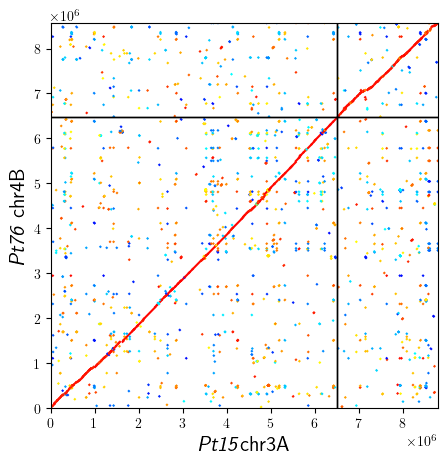

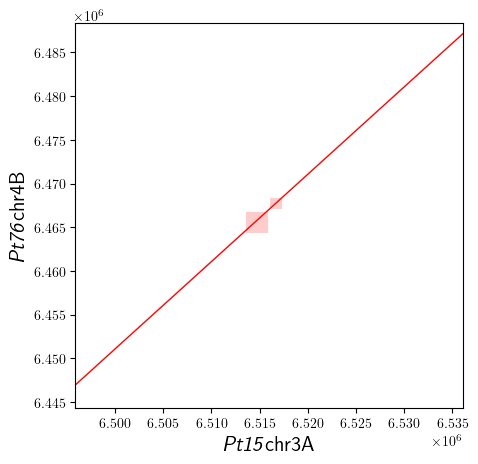

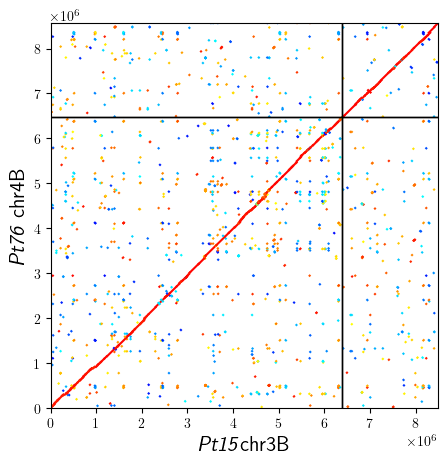

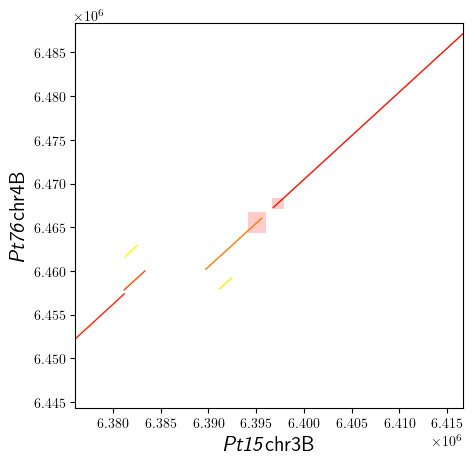

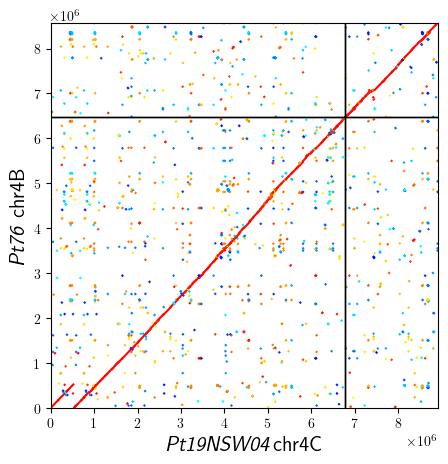

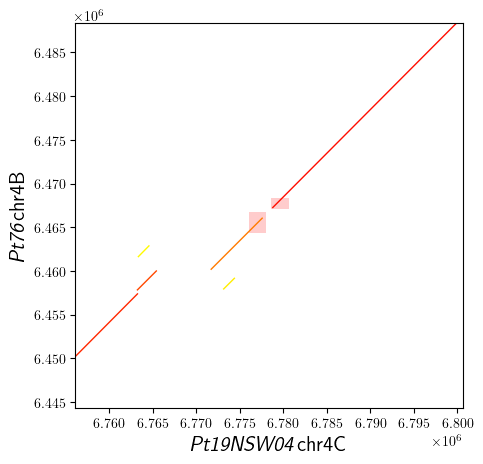

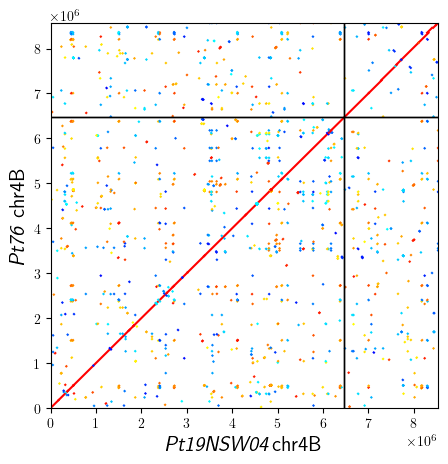

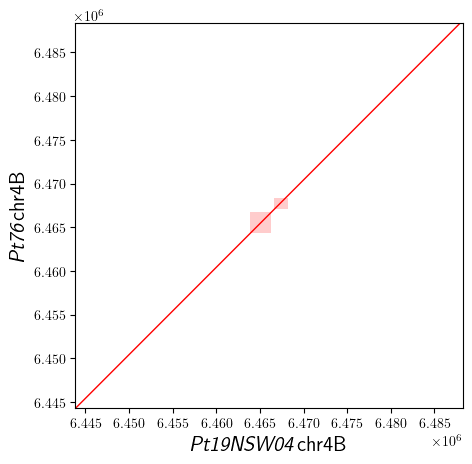

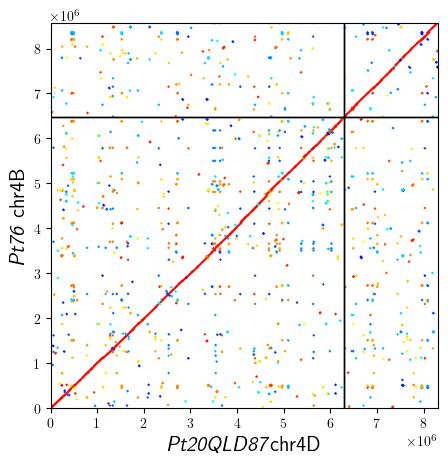

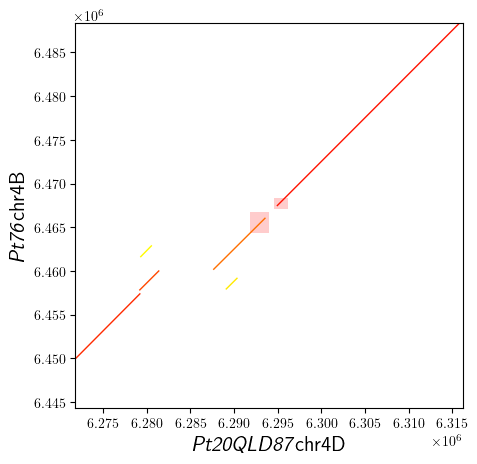

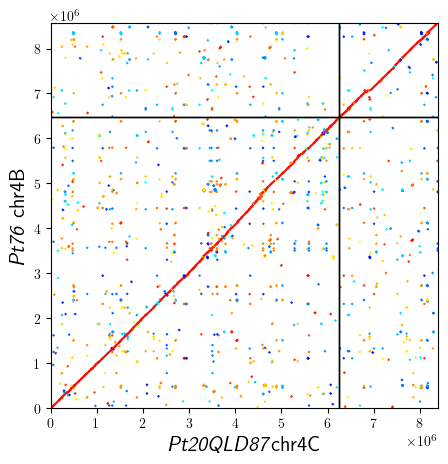

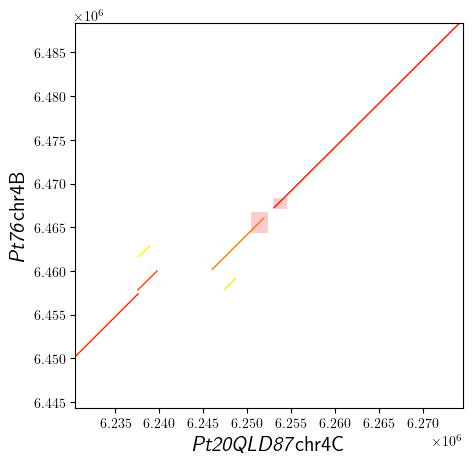

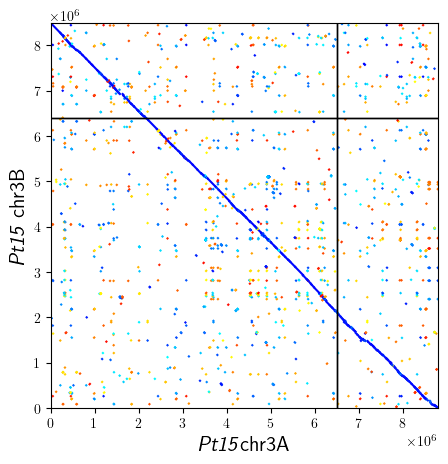

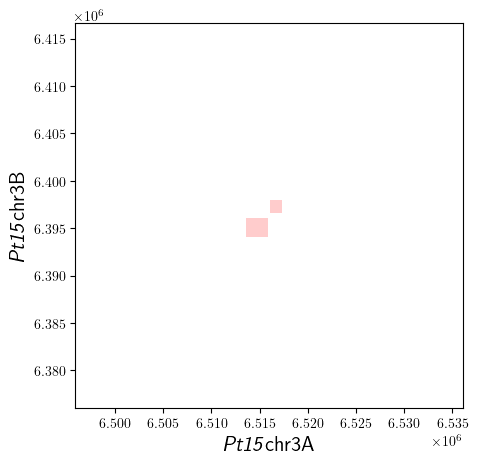

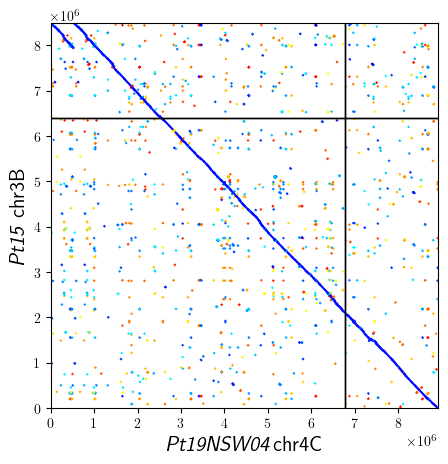

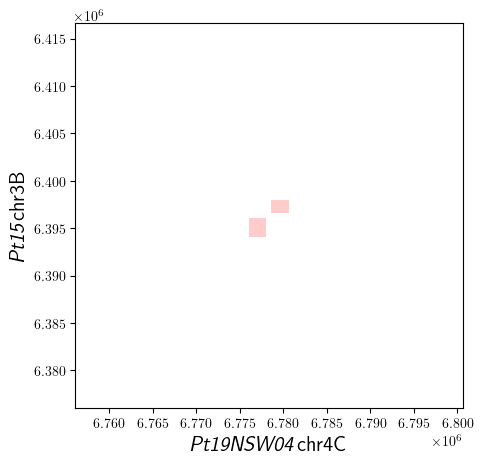

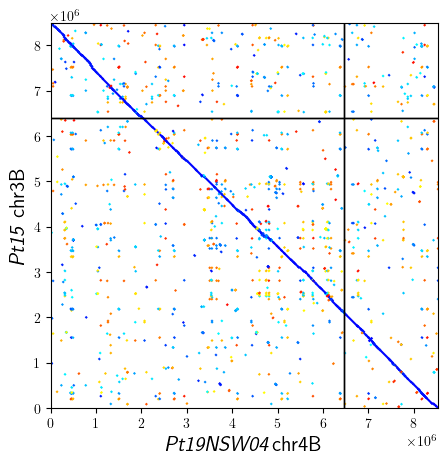

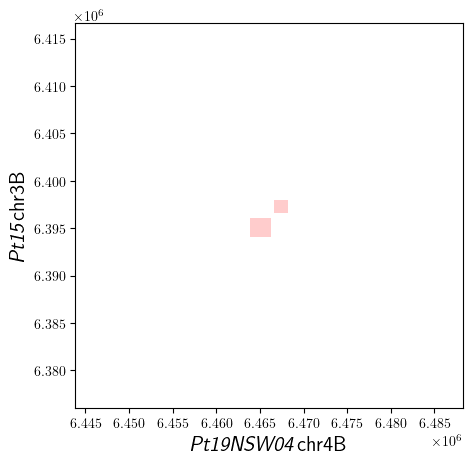

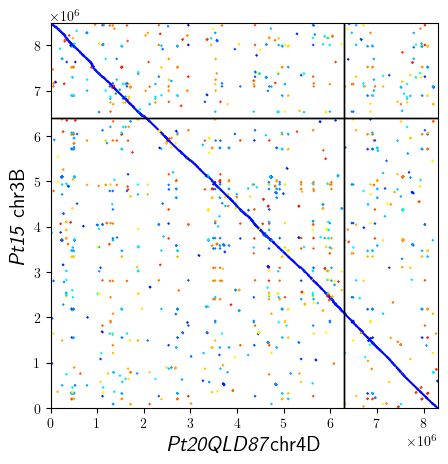

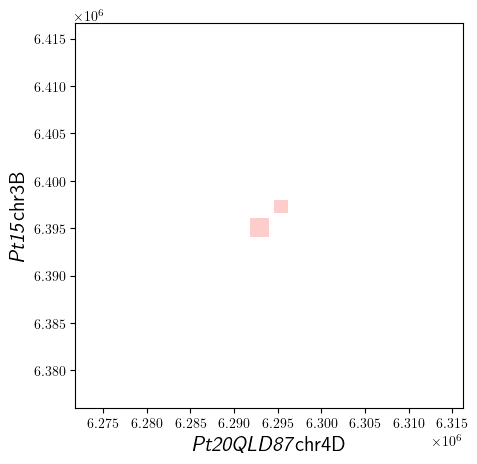

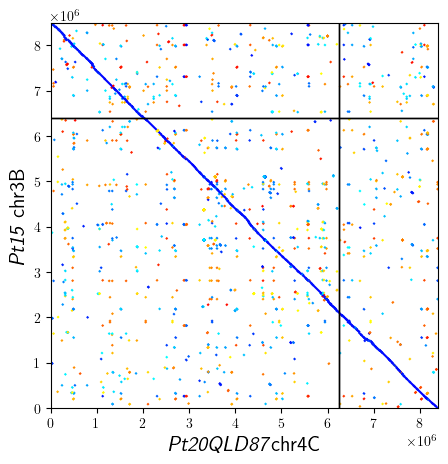

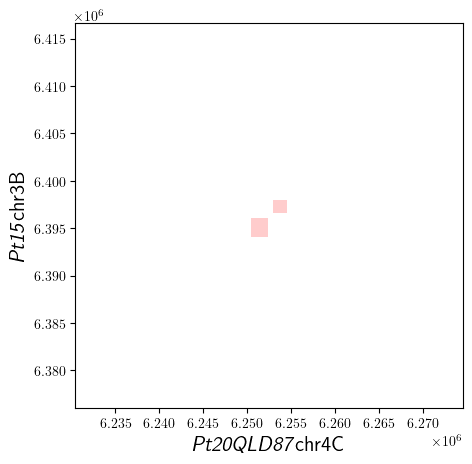

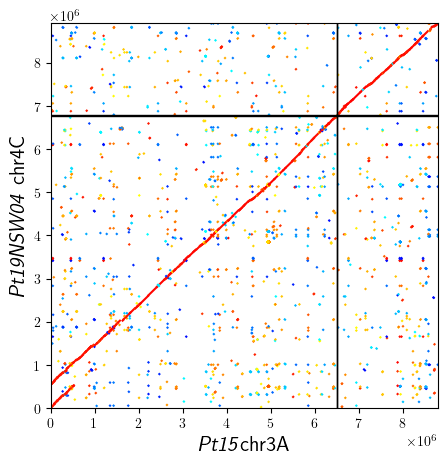

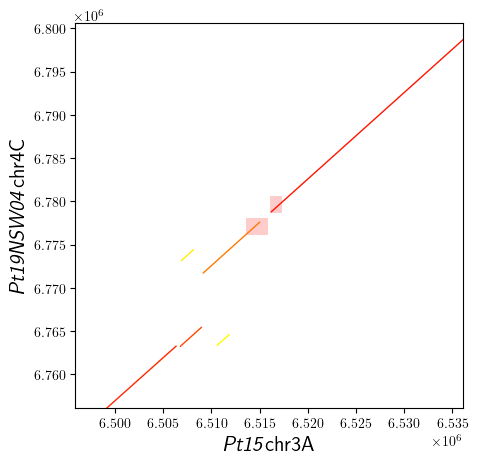

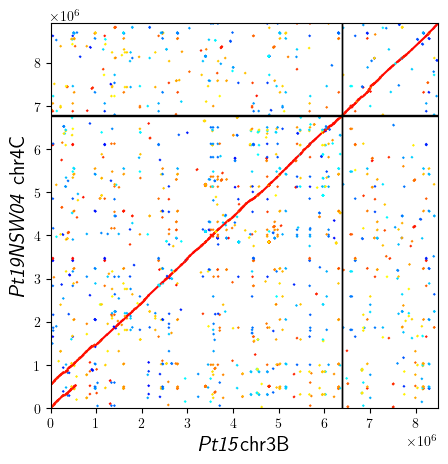

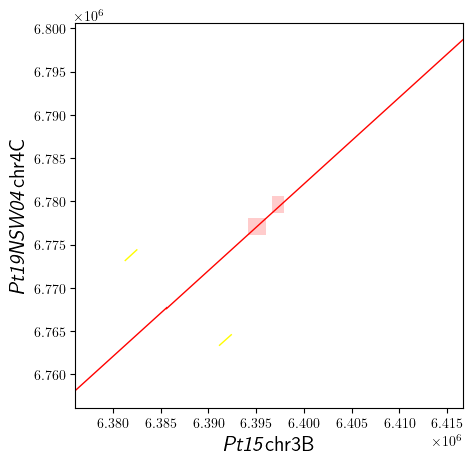

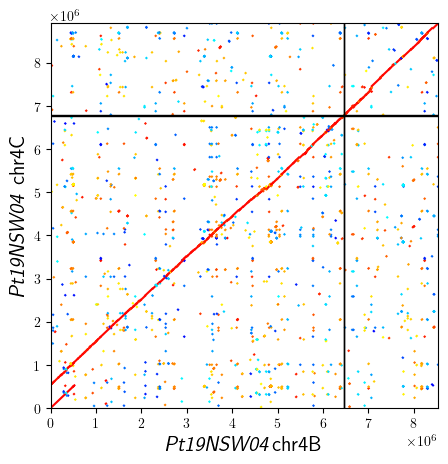

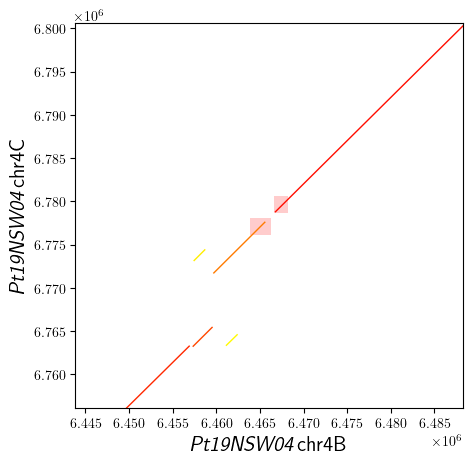

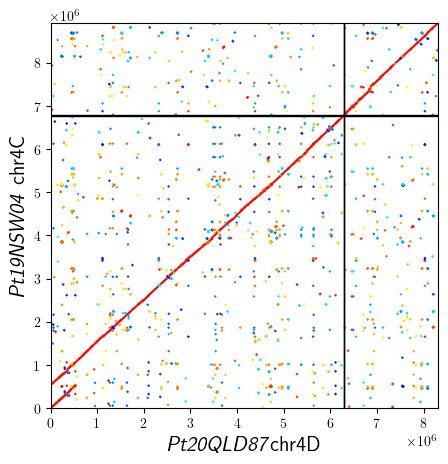

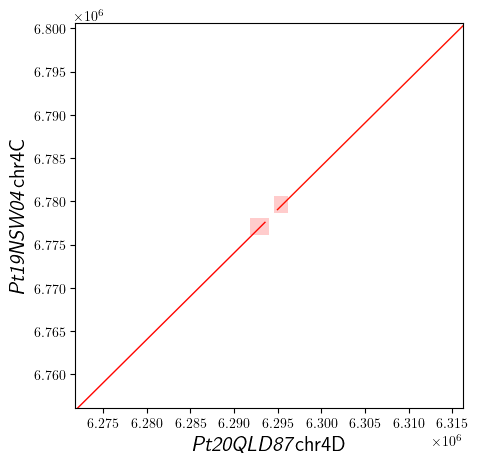

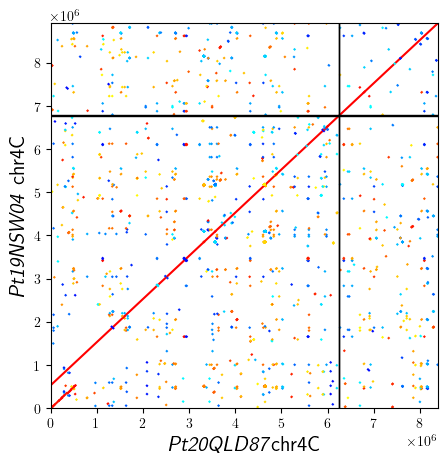

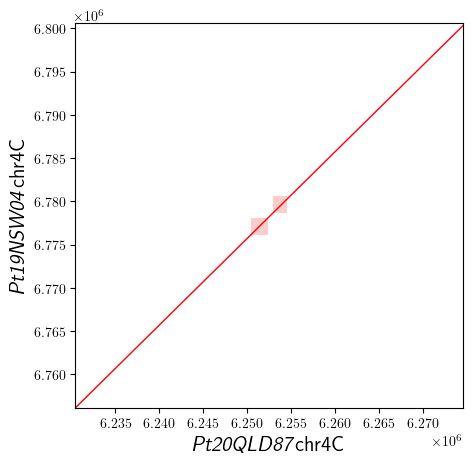

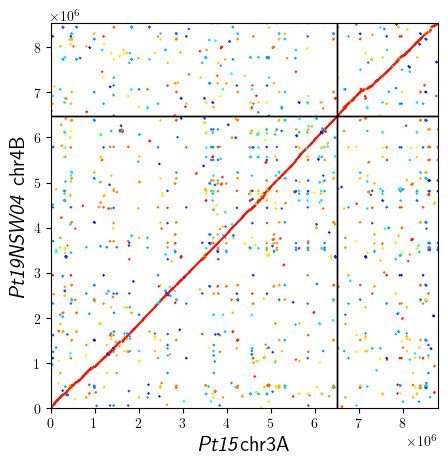

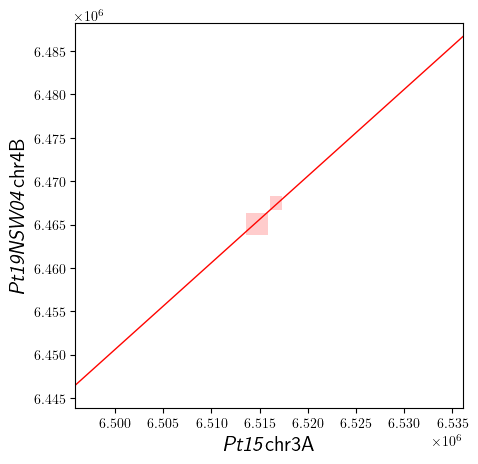

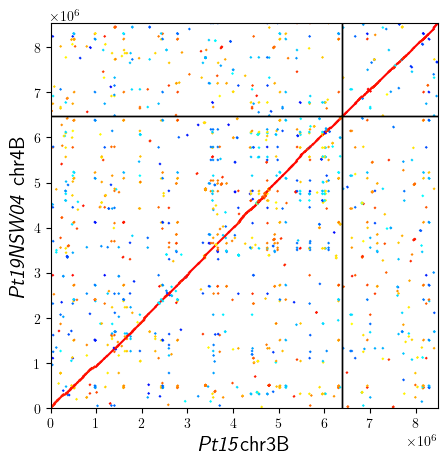

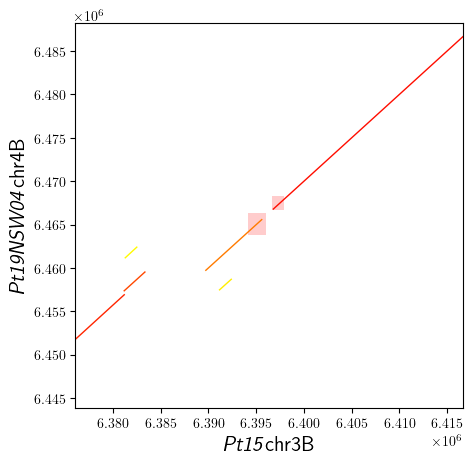

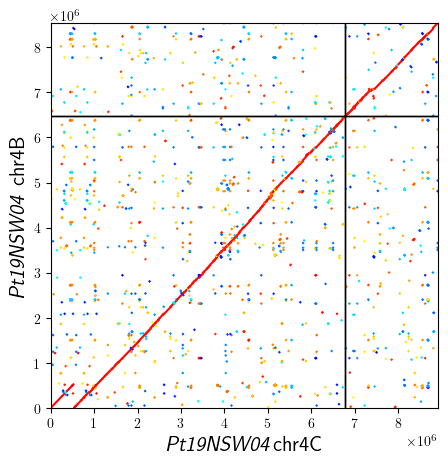

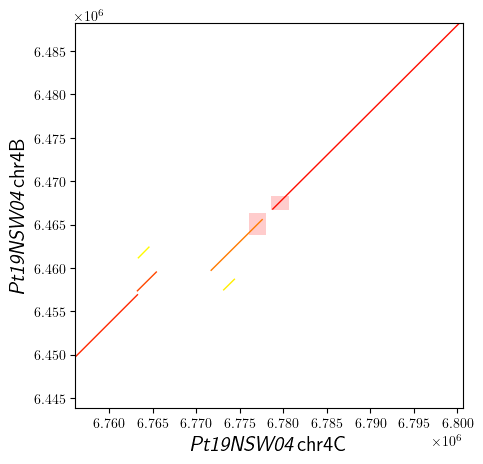

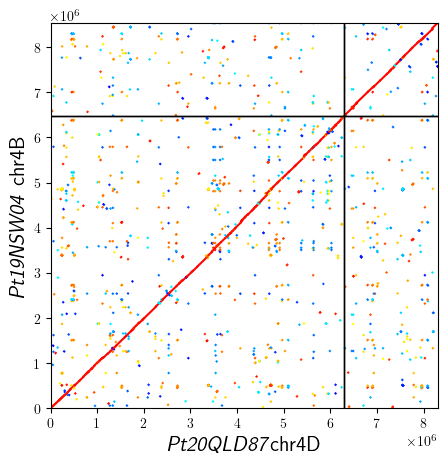

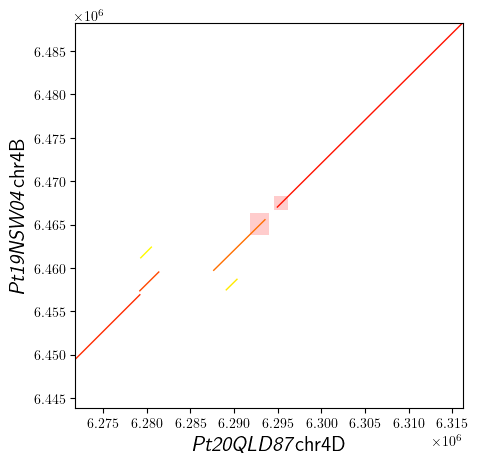

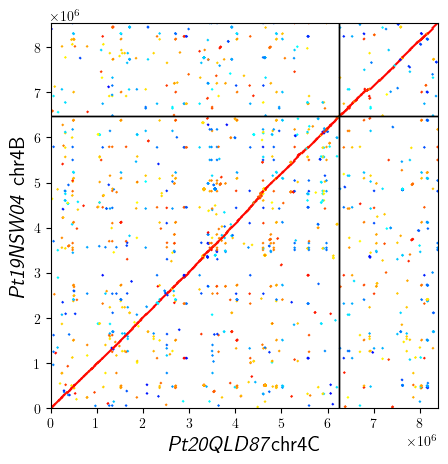

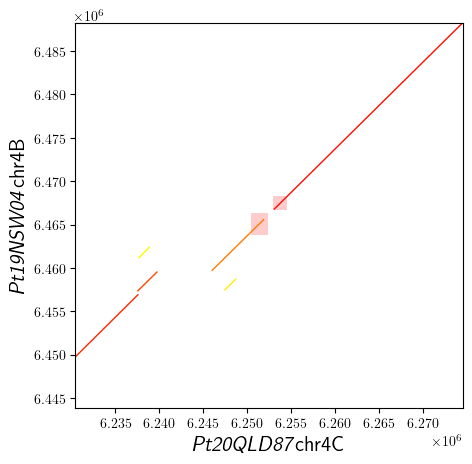

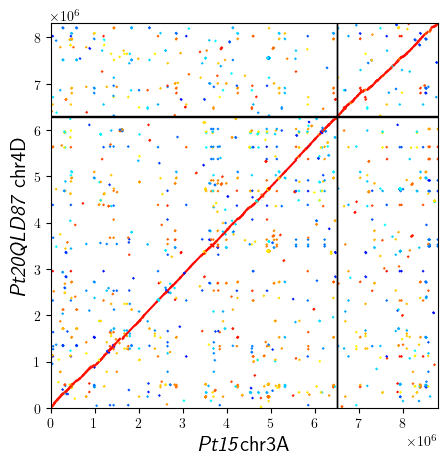

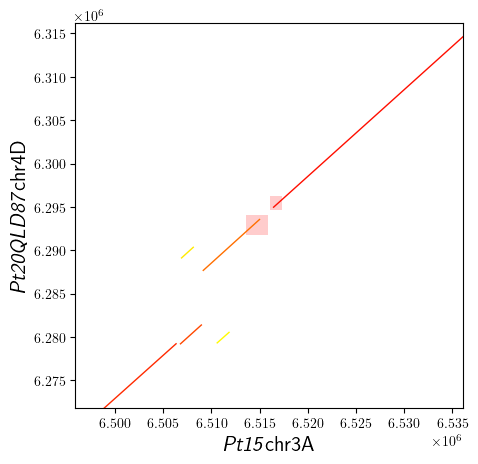

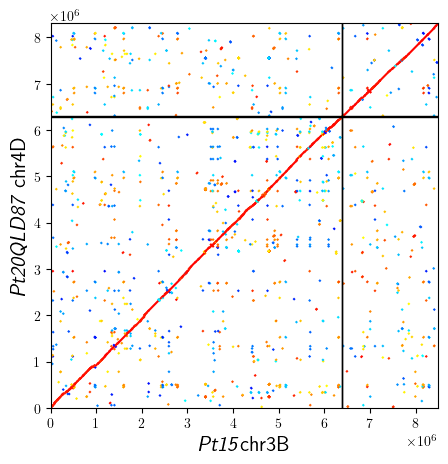

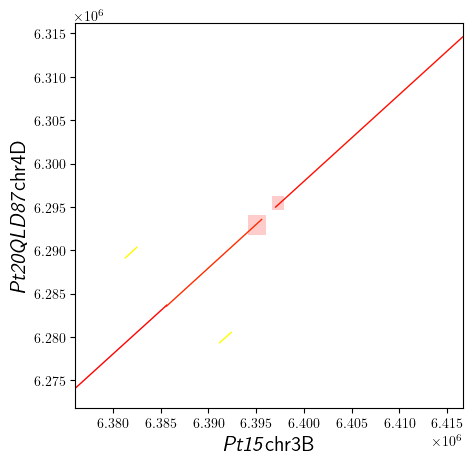

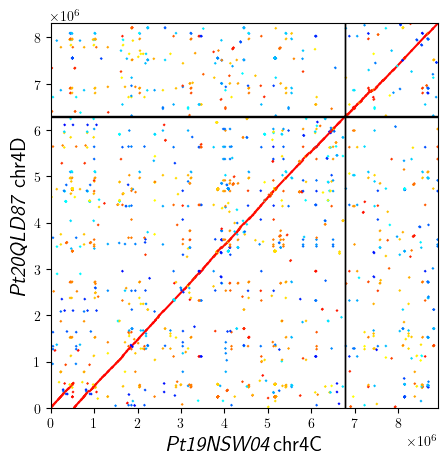

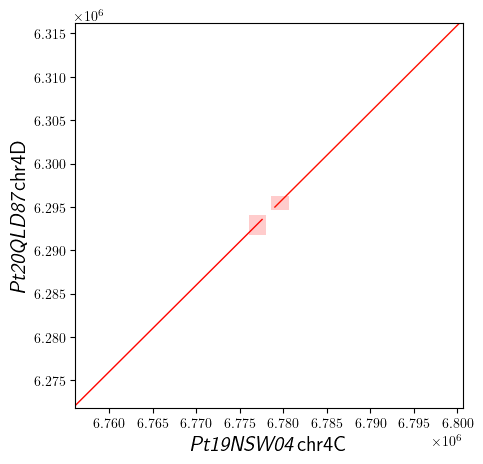

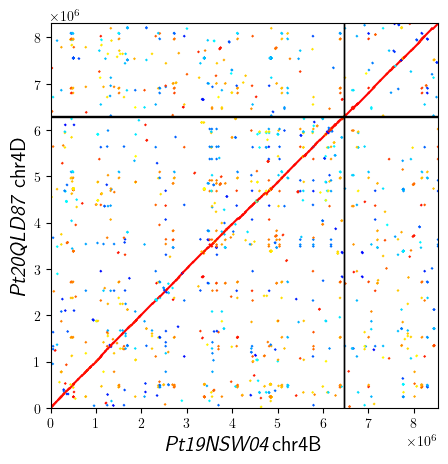

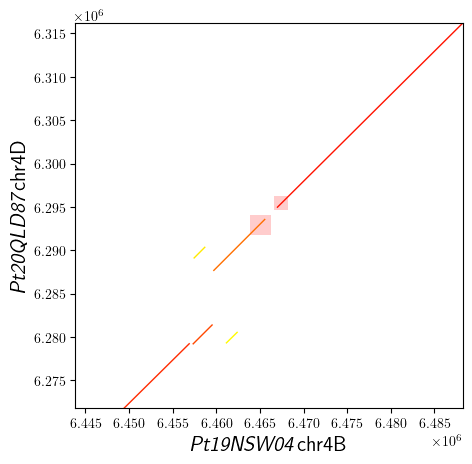

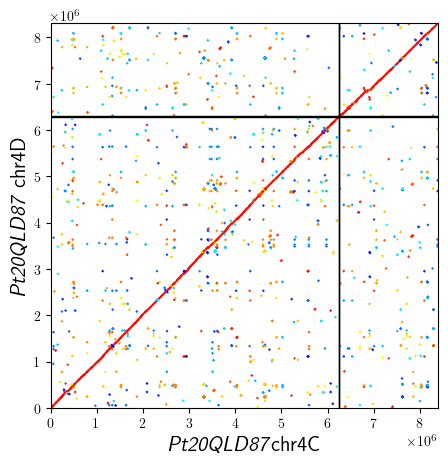

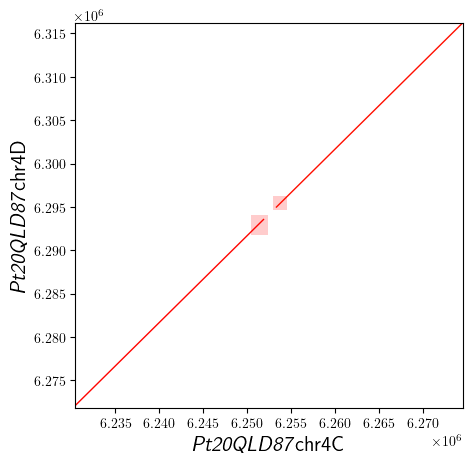

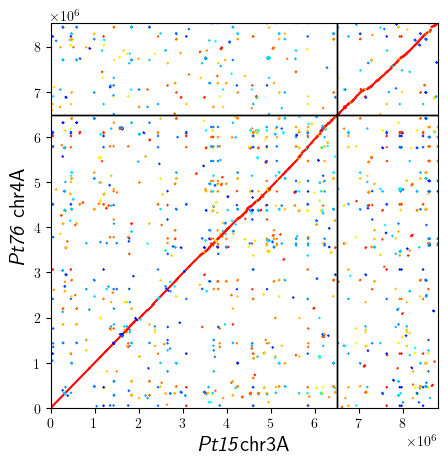

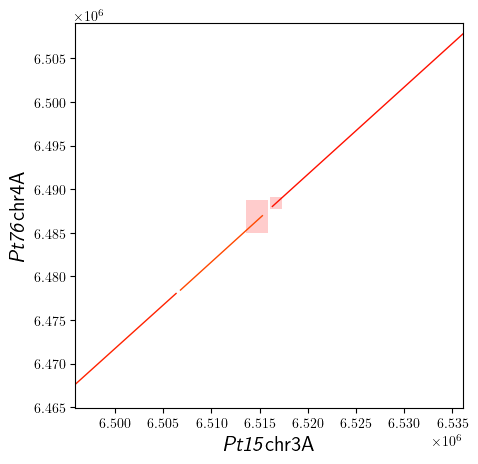

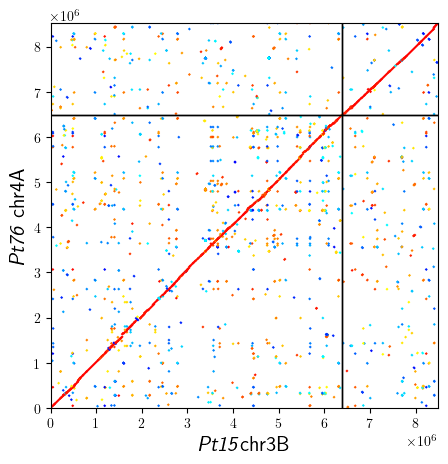

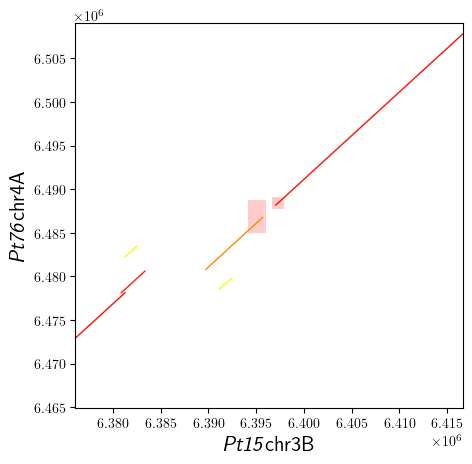

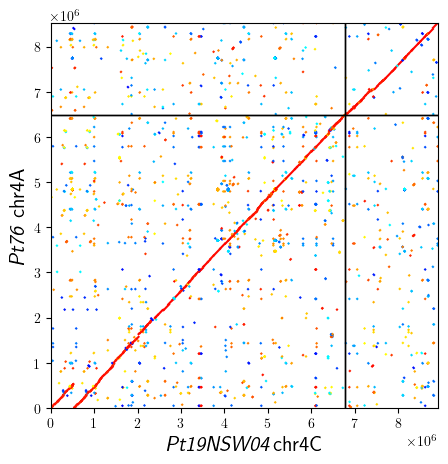

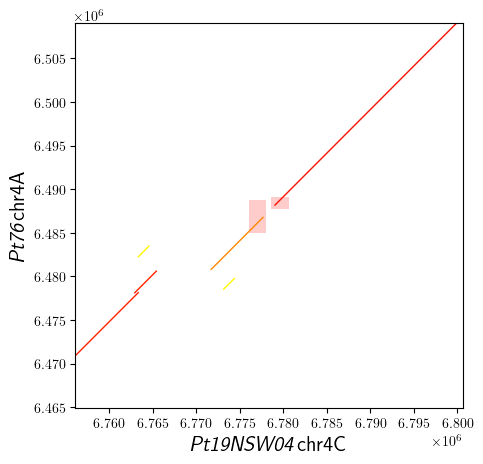

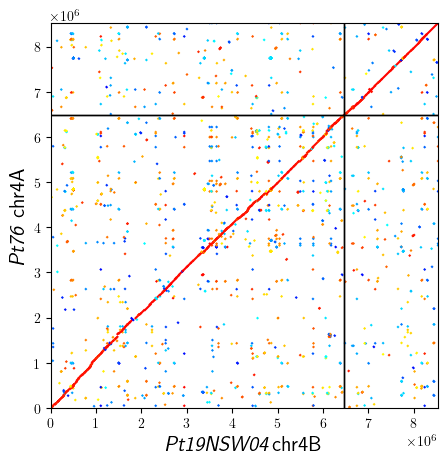

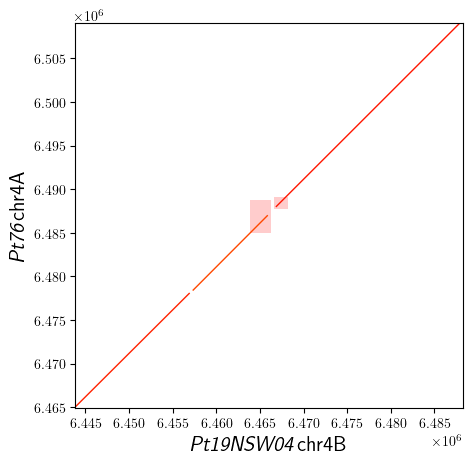

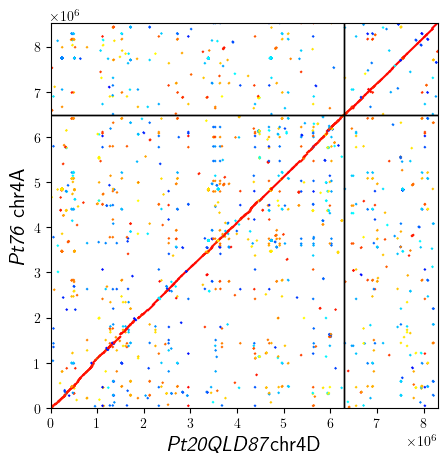

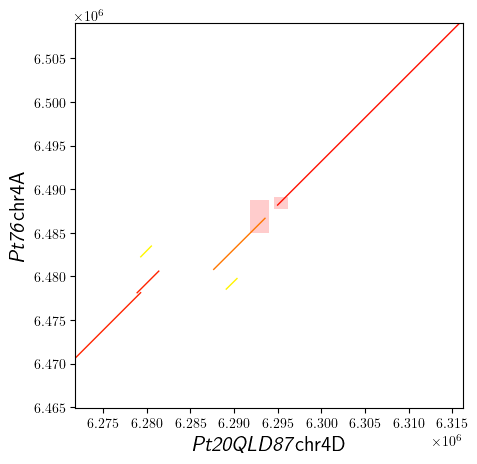

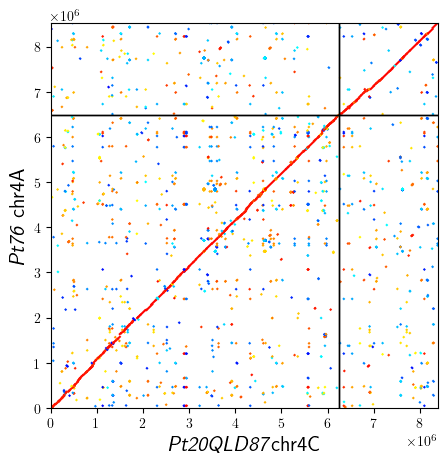

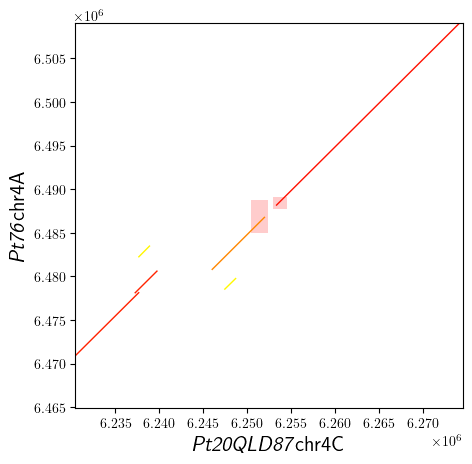

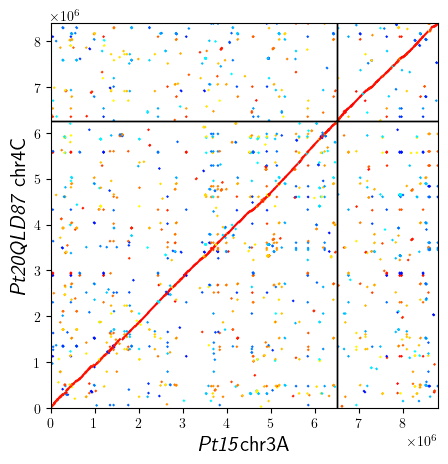

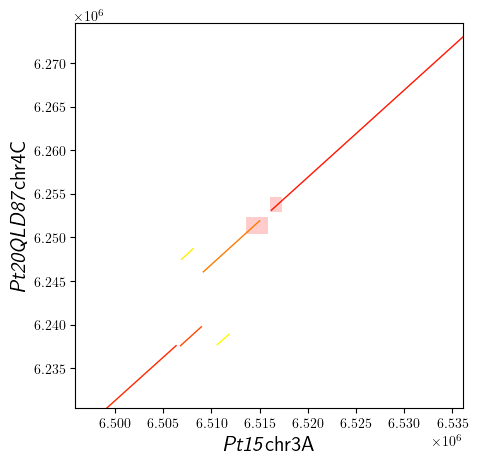

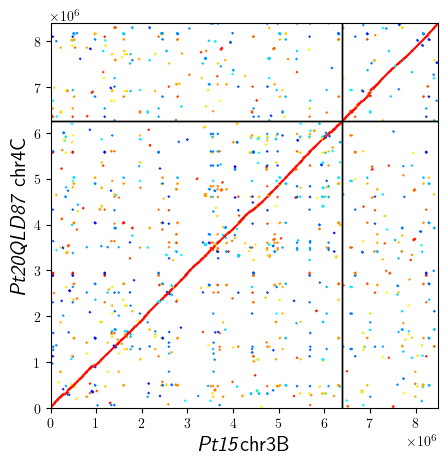

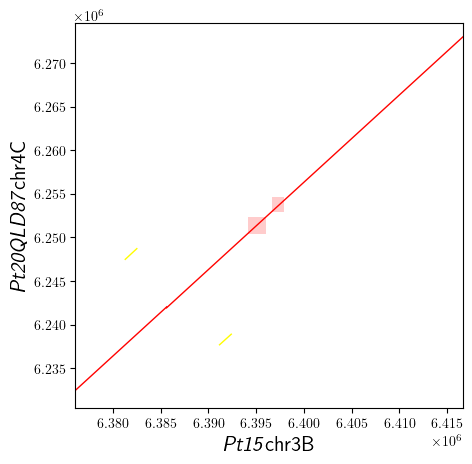

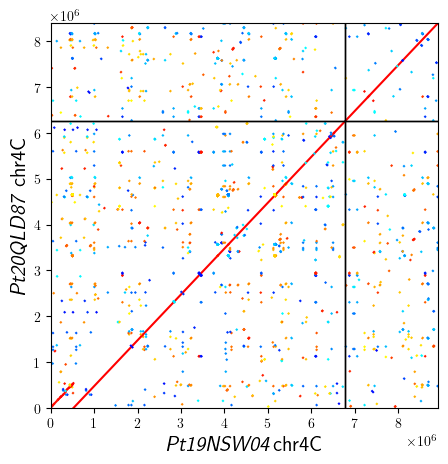

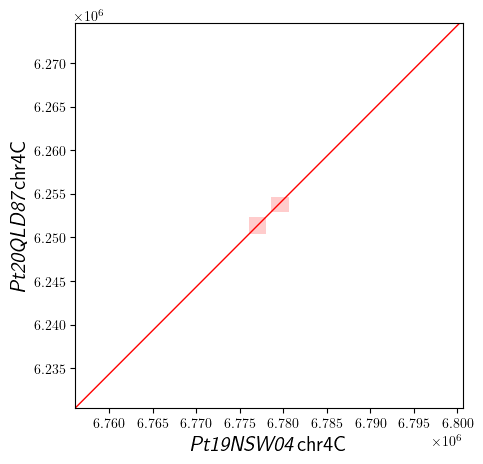

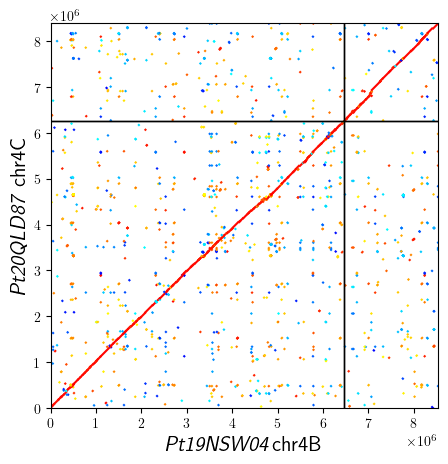

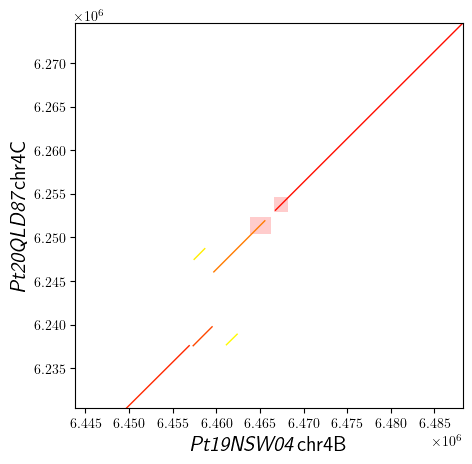

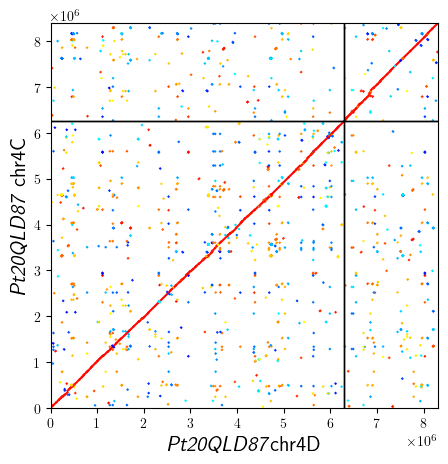

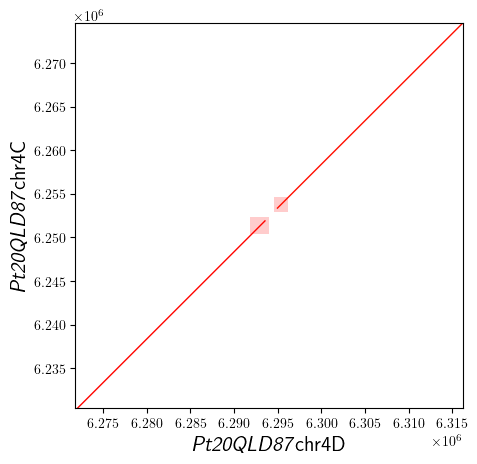

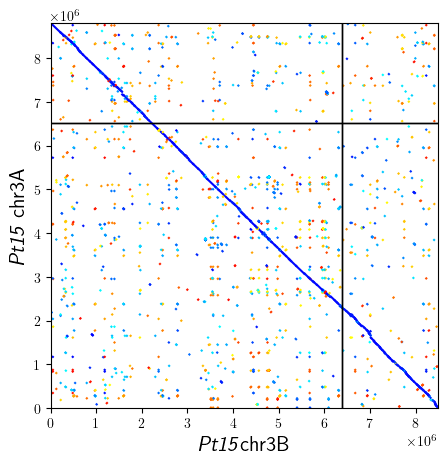

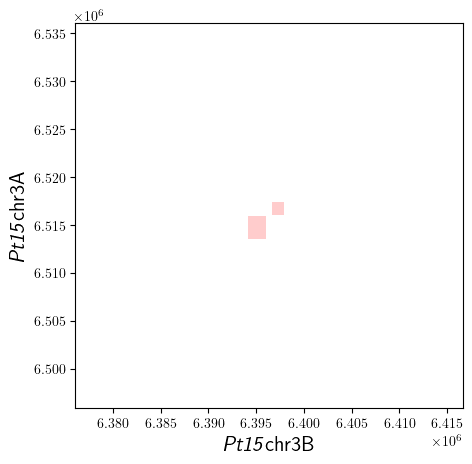

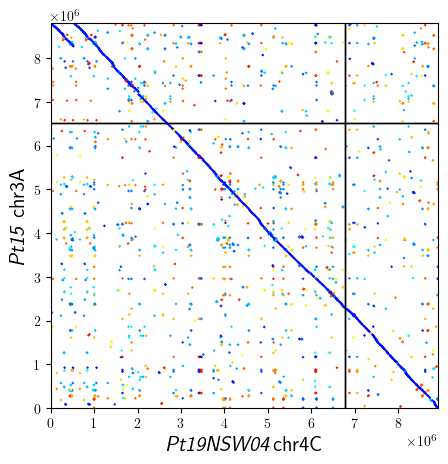

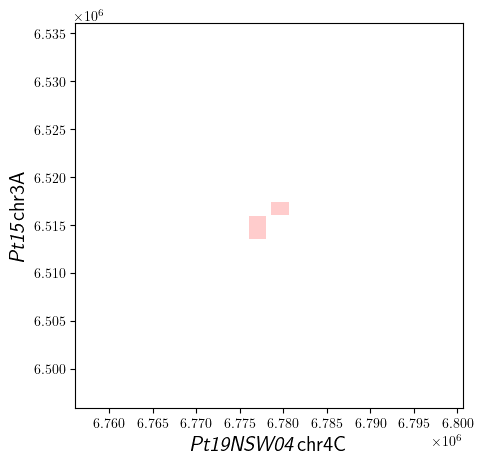

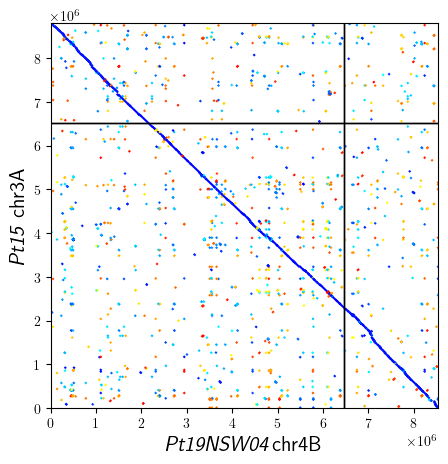

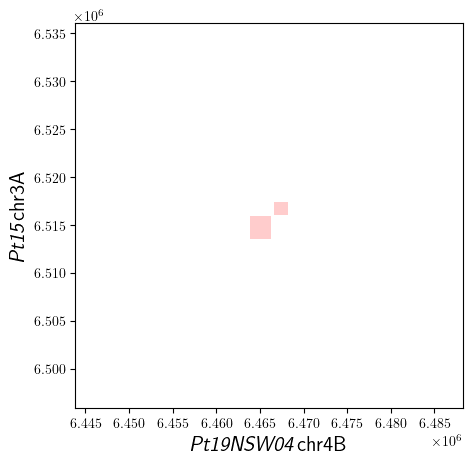

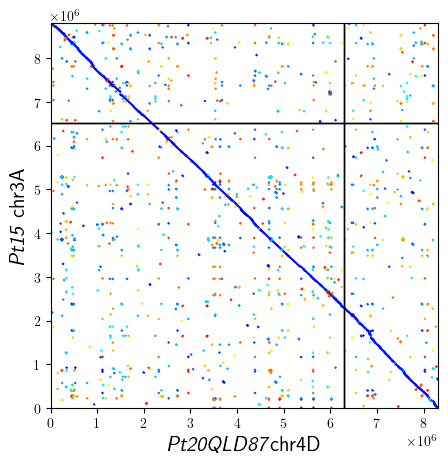

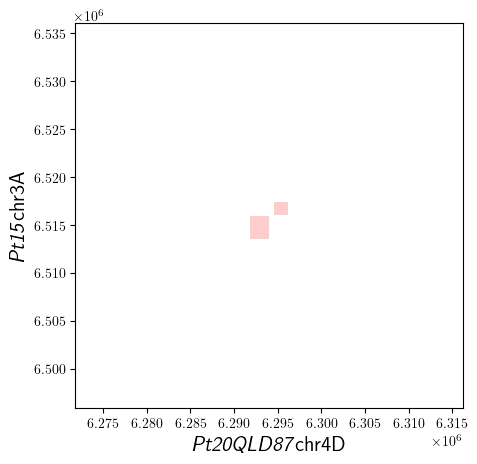

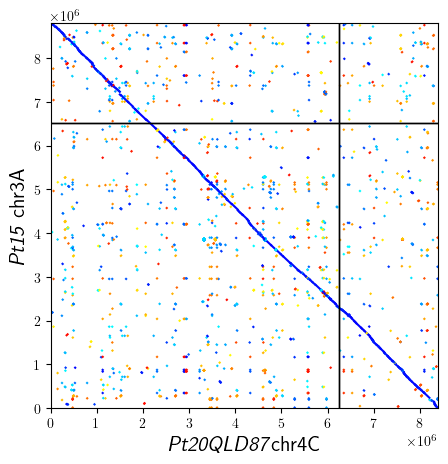

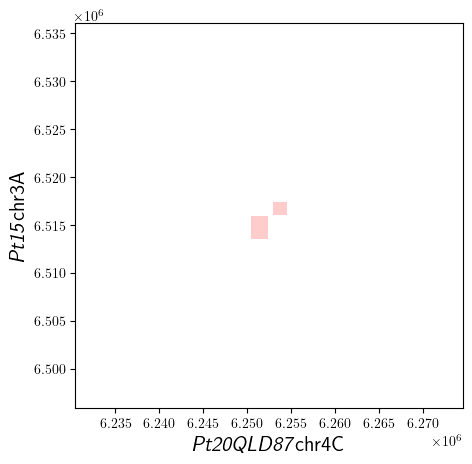

In [45]:
for i in range(len(seperate_coords(filtered_coords_list[0]))):
    makeplot(seperate_coords(filtered_coords_list[0])[i], 5)
    make_zoomin_plot(seperate_coords(filtered_coords_list[0])[i], 5, 20000)

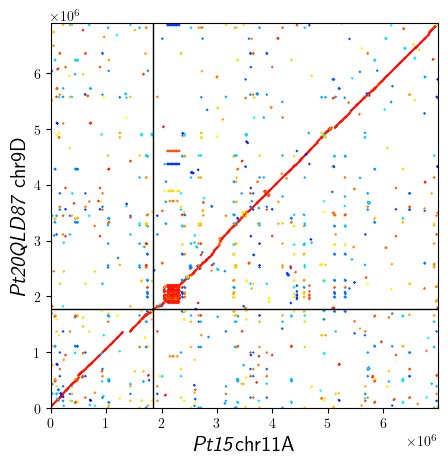

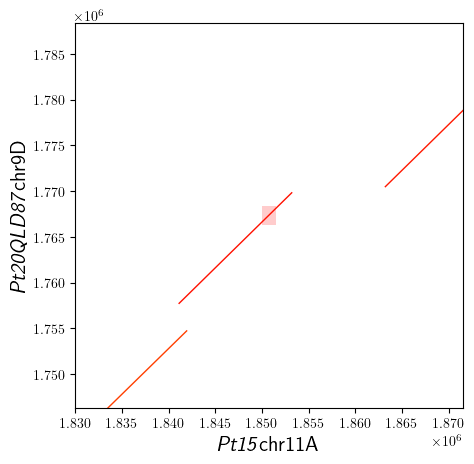

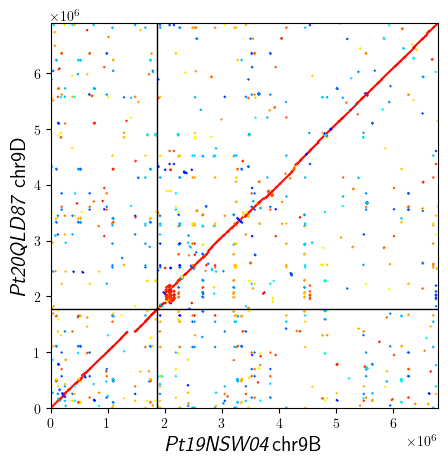

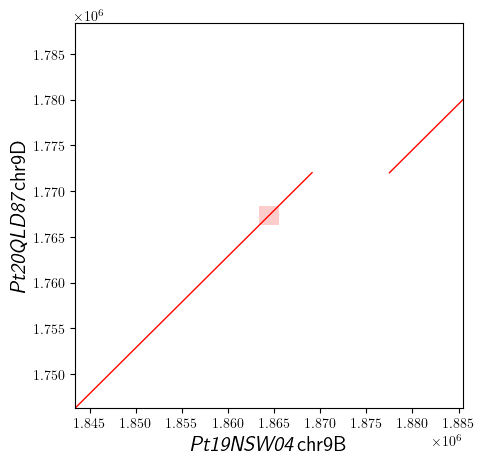

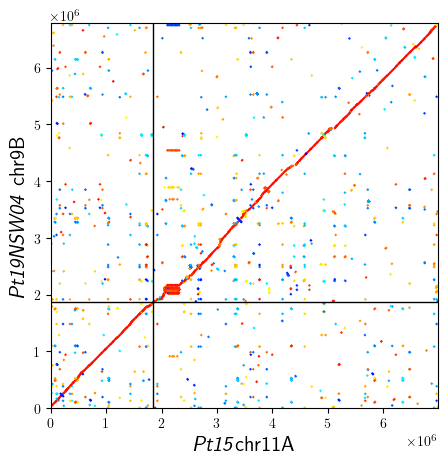

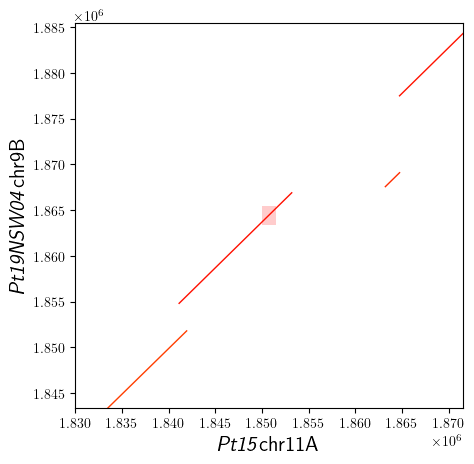

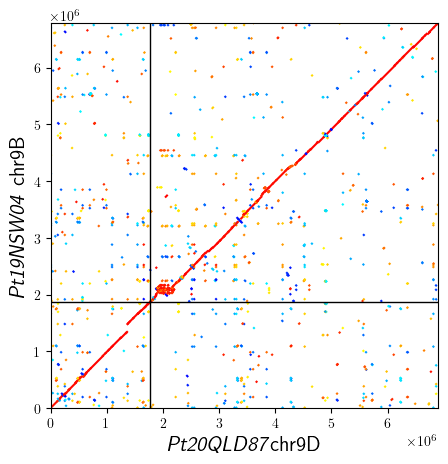

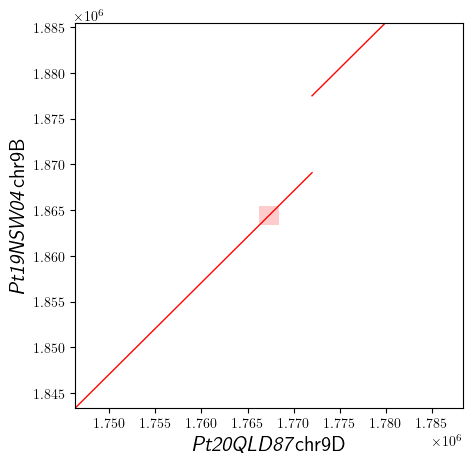

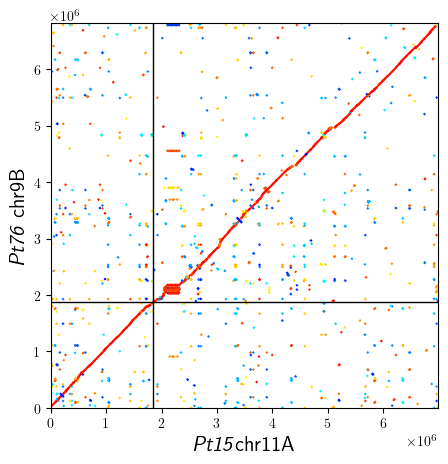

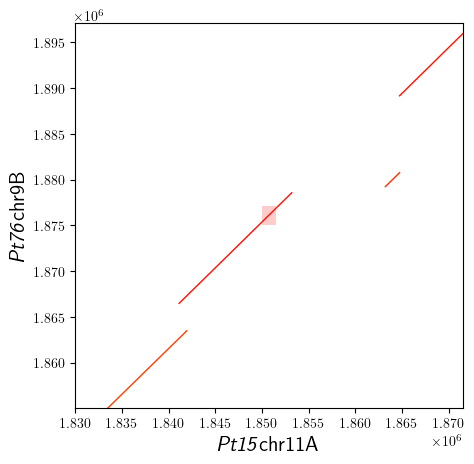

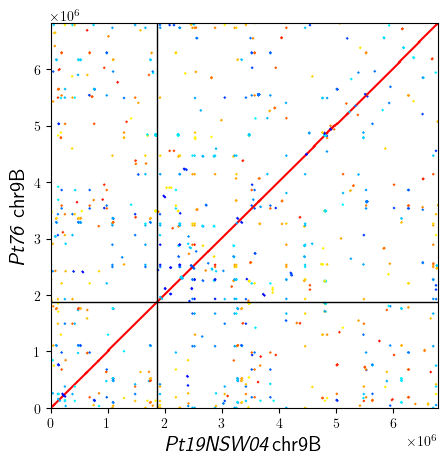

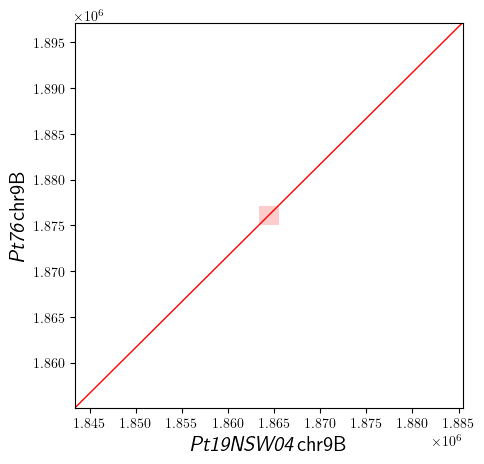

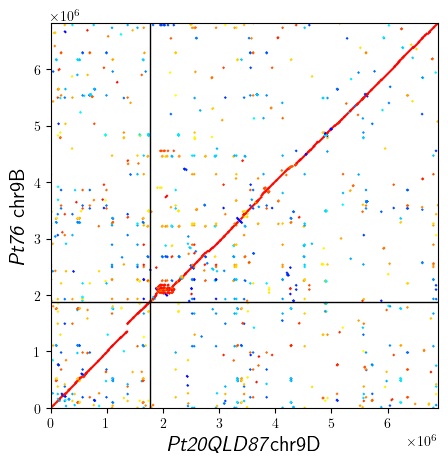

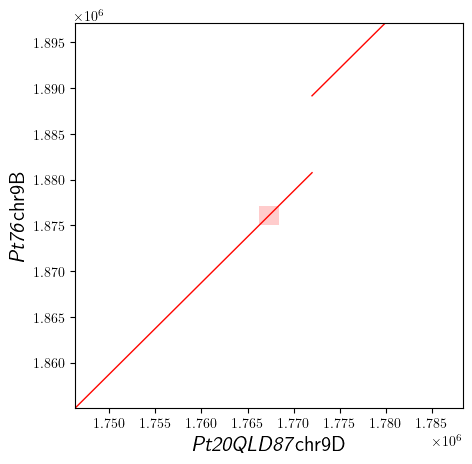

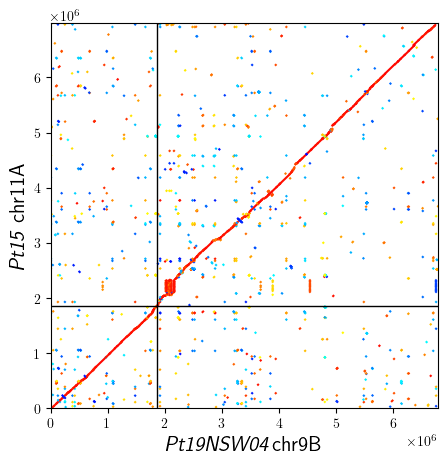

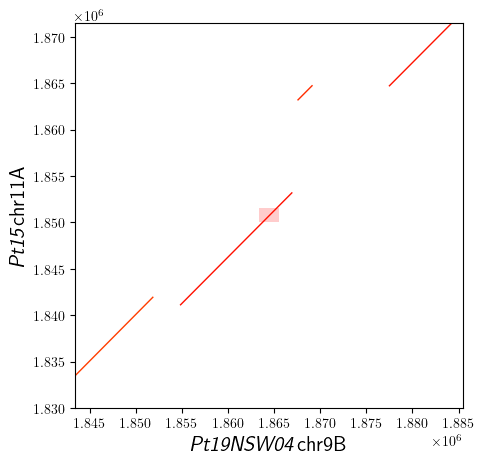

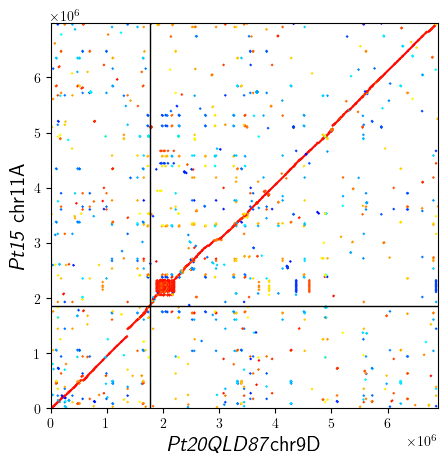

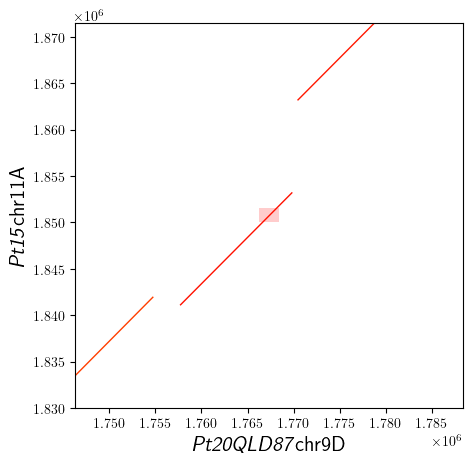

In [46]:
for i in range(len(seperate_coords(filtered_coords_list[1]))):
    makeplot(seperate_coords(filtered_coords_list[1])[i], 5)
    make_zoomin_plot(seperate_coords(filtered_coords_list[1])[i], 5, 20000)

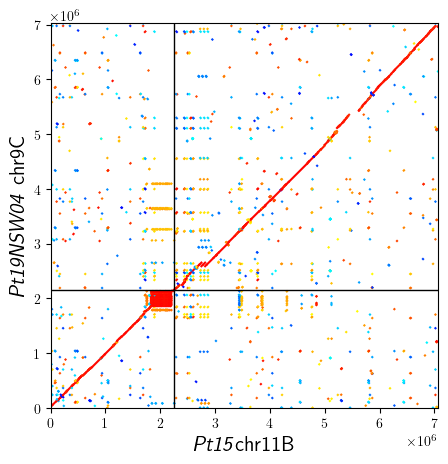

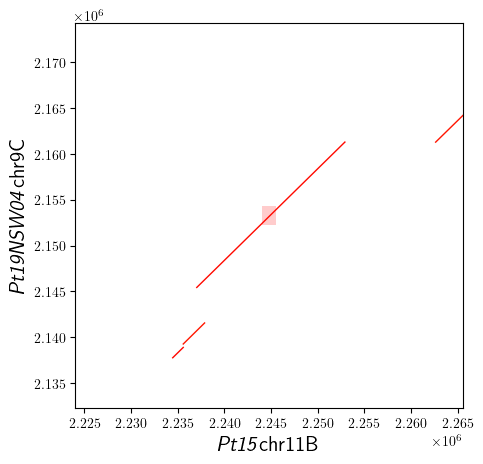

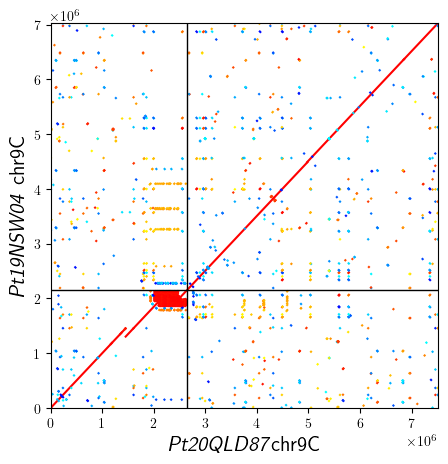

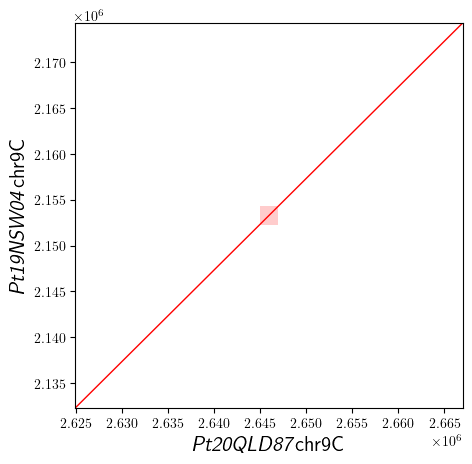

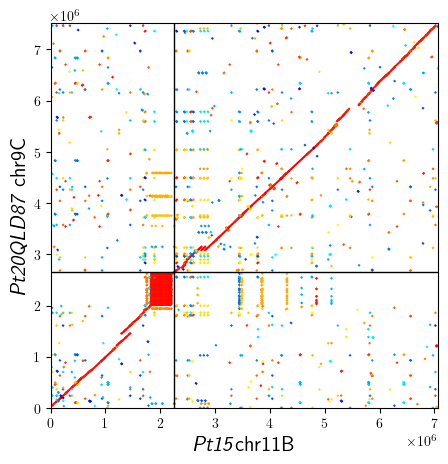

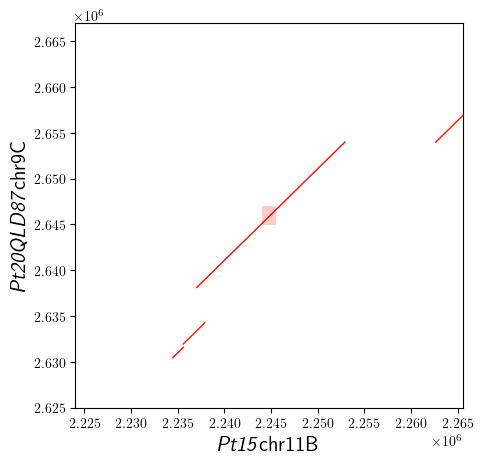

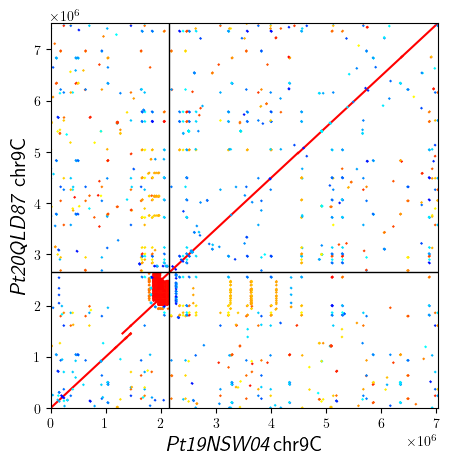

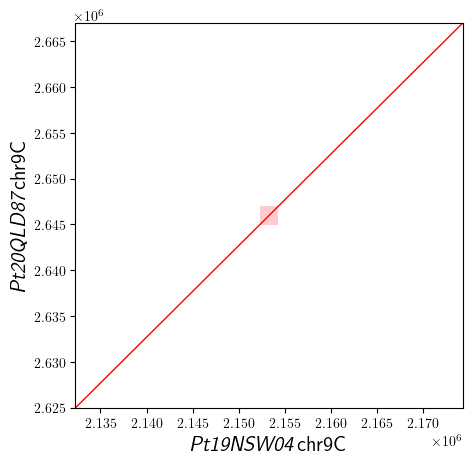

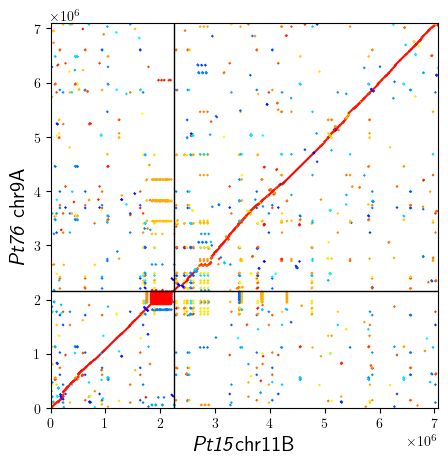

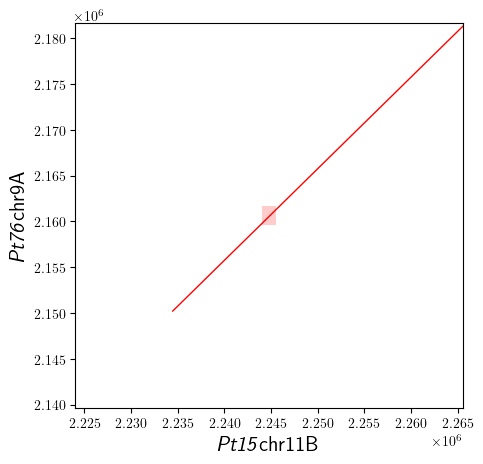

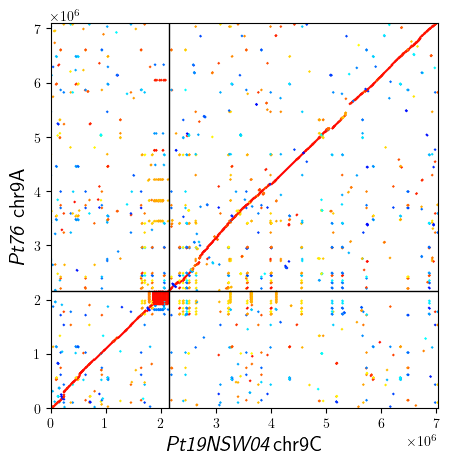

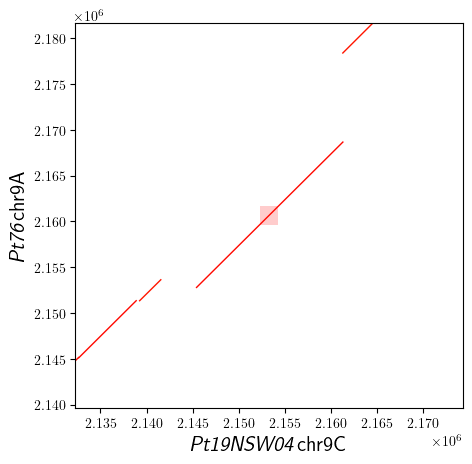

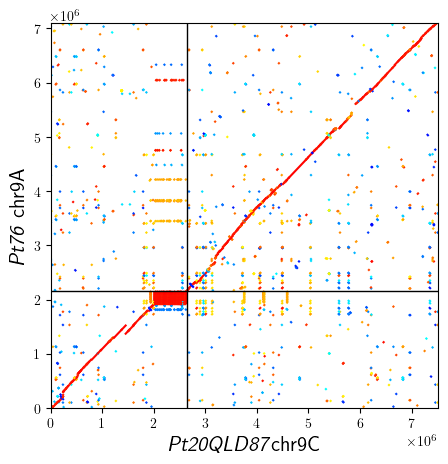

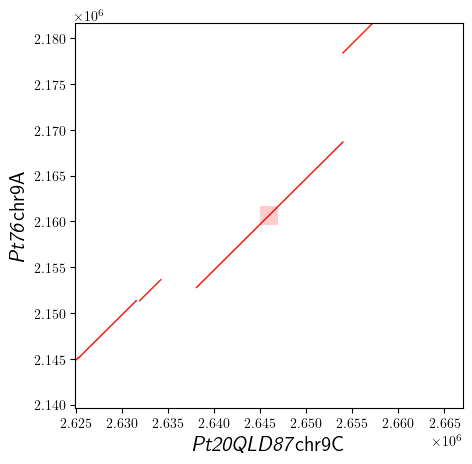

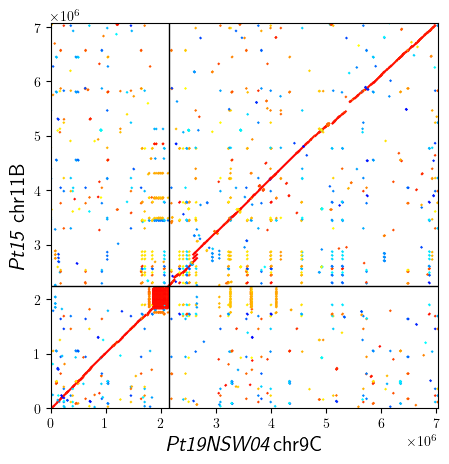

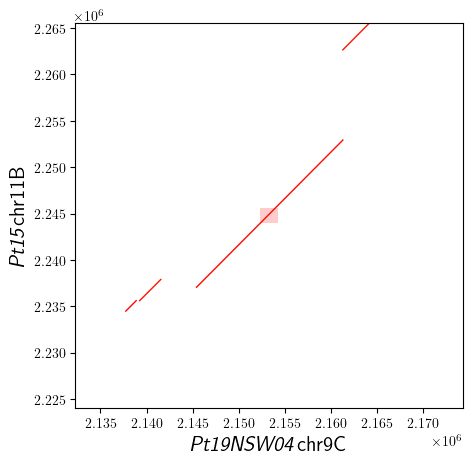

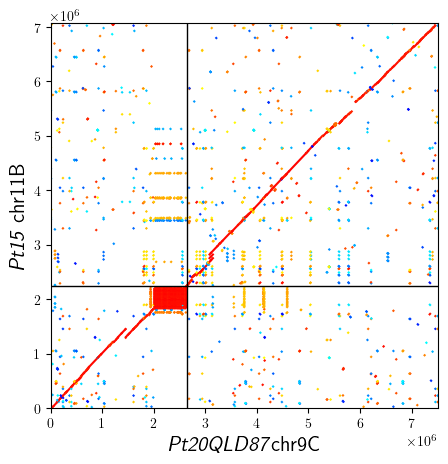

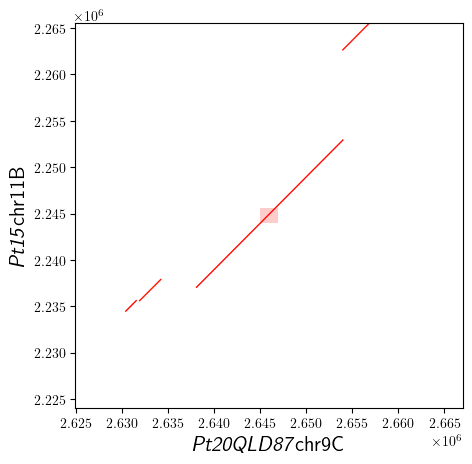

In [47]:
for i in range(len(seperate_coords(filtered_coords_list[2]))):
    makeplot(seperate_coords(filtered_coords_list[2])[i], 5)
    make_zoomin_plot(seperate_coords(filtered_coords_list[2])[i], 5, 20000)

#Since have multiple input

In [ ]:
coords_list = []
ref = filtered_coords["REF"].unique()
query = filtered_coords[filtered_coords.REF.isin(ref)]["QUERY"].unique()
for r in ref:
    for q in query:
            coords_list.append(filtered_coords[(filtered_coords.REF.isin([r])) & (filtered_coords.QUERY.isin([q]))])

NameError: name 'filtered_coords' is not defined